# 1. Fibonacci series
# 2. Even/Odd check
# 3. define a simple function, like ax^2+bx+c for some a,b,c
# 4. Program that squares every element of a list x. Compare against numpy 
# 5. Load a D^2-dimensional vector where all the prime numbered indices are +1 and everything else is zero. Convert to D by D matrix and visualize

## Fibonacci Series

In mathematics, the Fibonacci numbers, commonly denoted $F_n$, form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1. That is,

${F_{0}=0, F_{1}=1,}$
and

${F_{n}=F_{n-1}+F_{n-2},}$
for n > 1.

Solve using both iterative and recursive methods

resources for memoization part: 
1. [memoization article](https://towardsdatascience.com/memoization-in-python-57c0a738179a)

In [24]:
def fib_iterative(n):
    fib_series = [0,1]
    for itr in range(2,n+1):
        fib_series.append(fib_series[itr-1]+fib_series[itr-2])
    
    return fib_series[n]

fib_iterative(10)

def fib_recursive(n):
    if(n==0): 
        return 0
    elif(n==1): 
        return 1
    else:
        return fib_recursive(n-1) + fib_recursive(n-2)


mem_fib = np.zeros(10000)
mem_fib[1] = 1
    
def fib_recursive_memoize(n):
    if(n==0): 
        return 0
    elif(n==1): 
        return 1
    else:
        if(mem_fib[n]!= 0):
            return mem_fib[n]
        else:
            mem_fib[n] = fib_recursive_memoize(n-1) + fib_recursive_memoize(n-2)
            return mem_fib[n]
    
'''
Storing the values in the cache memory
Please remove this if it is too much information
'''
from functools import lru_cache

@lru_cache(maxsize = 1000)
def fib_recursive_with_memoization(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    elif n >= 2:
        return fib_recursive_with_memoization(n -1) + fib_recursive_with_memoization(n -2)

    

In [25]:
fib_recursive(0)


0

## Even/Odd check

Check if a particular number is even or odd and print the result as {num} is odd/even.

In [26]:
def even_odd_check(n):
    if(n%2 == 0):
        print("{0} is even".format(n))
        return
    else:
        print("{0} is odd".format(n))
        return

even_odd_check(134567)
even_odd_check(12345678)

134567 is odd
12345678 is even


## Parabola Visualization

Define a function with takes in parameters as a,b,c and plots the curve $y(x) = a x^2 + b x + c $ and also the parabola shifted  so that you can see the minimum at the origin

Resources for plotting: 
    1.[matplotlib on geeksforgeeks](https://www.geeksforgeeks.org/pyplot-in-matplotlib/)
    2.[matplotlib documentation](https://matplotlib.org/3.3.1/tutorials/index.html)


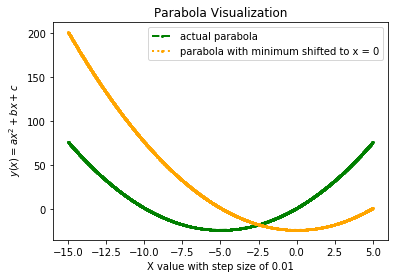

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def parabola(a, b, c, x):
    return a*x**2 + b*x + c

def plot(a,b,c):
    x_val = np.arange(-10-b/(2*a), 10-b/(2*a), 0.01)
    y_val = [parabola(a,b,c,x) for x in x_val]
    y_val_displaced = [parabola(a,b,c,x-b/(2*a)) for x in x_val]
    
    plt.xlabel('X value with step size of 0.01')
    plt.ylabel(r' $y(x) = a x^2 + b x + c $')
    plt.plot(x_val, y_val, color='green',label = "actual parabola", marker='o', linestyle='dashed', linewidth=2, markersize=2)
    plt.plot(x_val, y_val_displaced, color='orange',  label = "parabola with minimum shifted to x = 0", marker='o', linestyle='dotted', linewidth=2, markersize=2)
    plt.title("Parabola Visualization")
    plt.legend()
    plt.show()

plot(1,10,1)

## Compare list vs numpy

Write a program that squares every element of a list x without and with using numpy. Compare both.

In [1]:
import numpy as np

def square_elem(x_val):
    res = []
    for i in x_val:
        res.append(i**2)
        
    return res

def square_elem_numpy(x_val):
    res = np.array(x_val)
    
    return np.square(res)

def compare(x_val):
    %timeit square_elem(x_val)
    %timeit square_elem_numpy(x_val)

x_val = np.random.randint(0,100, 1000)
compare(x_val)

    

442 µs ± 4.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.44 µs ± 67.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Prime number and matrices

Create a $D^2$-dimensional vector where all the prime numbered indices are +1 and everything else is zero. Convert to D by D matrix and visualize.

In [2]:
def prime_generator(n):
    primes = [2]
    for curr_val in range(3,n+1):
        prime_found = 1
        for check_val in range(2,curr_val):
            if(curr_val%check_val == 0):
                prime_found = 0
                break
        if(prime_found):
            primes.append(curr_val)
    return primes
        
        
print(prime_generator(100))

'''
efficient way of finding primes iterating only till required values
'''
def prime_gen(n):
    primes = [2]
    curr_val = primes[-1] #curr_val set to last found prime
    while(curr_val< n): #check that curr_val is less than required value n
        curr_val +=1
        itr = 0
        while(itr < len(primes)): #iterate through the primes found till now
            if(curr_val%primes[itr] == 0): #if found that number is divisible by a prime in the list reset the iterator to first prime and increase the curr_val by 1
                curr_val +=1
                itr = 0
            else:
                itr +=1
        if(curr_val < n):
            primes.append(curr_val)    
    return primes

print(np.array(prime_gen(100)).flatten())

def prime_ind_vector(d):
    vect = np.zeros(d**2)
    primes = prime_gen(d**2)
    
    for i in primes:
        vect[i] = 1
    
    return vect.reshape(d,d)

print(prime_ind_vector(10))


'''
Comparison between both prime generators
'''
def compare(n):
    %timeit prime_generator(n)
    %timeit prime_gen(n)

compare(10000)
        
            
        
            

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[[0. 0. 1. 1. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
447 ms ± 9.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
157 ms ± 30.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
